In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox


In [2]:
df = pd.read_csv("combined_results.csv")

metric = "LogLoss"
df = df[df["metric"] == metric]
#df = df[df['suite_id'] == 336]

splits = [s for s in df["split_method"].unique() if s.lower() != "random_split"]
 
method_order = [
    'ConstantPredictor', 'LogisticRegressor' , 'RandomForestClassifier', 'RandomForestRegressor', 'LGBMClassifier', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'TabPFNClassifier'
]
rename_map = {
    'RandomForestClassifier': 'Random Forest',
    'RandomForestRegressor': 'Random Forest',
    'LGBMClassifier': 'Boosted Trees',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LogisticRegressor': 'Logistic Regression',
    'TabPFNClassifier': 'TabPFN'
}

# 3) Extract unique suites, metrics, and extrapolation methods
suites  = df['suite_id'].unique()
metrics = df['metric'].unique()
methods = df['split_method'].unique()

Split 'umap_split': baseline LogLoss per task:
 task_id
361055    0.488352
361060    0.359598
361061    0.378800
361062    0.014759
361063    0.279596
361065    0.196465
361066    0.432798
361068    0.174608
361069    0.542440
361070    0.684706
361110    0.461733
361111    0.679124
361113    0.636745
361273    0.665042
361274    0.426903
361275    0.540888
361276    0.552108
361277    0.271749
361278    0.646512
361282    0.616628
361283    0.564172
361285    0.427274
361286    0.581301
dtype: float64
Split 'umap_split': overall lowest LogLoss = 0.0147590129885558



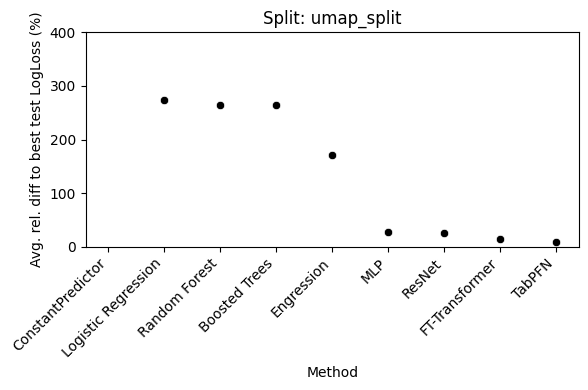

Split 'kmedoids_split': baseline LogLoss per task:
 task_id
361110    0.417091
361111    0.640321
361113    0.452227
361282    0.597244
361283    0.460022
361285    0.454733
361286    0.602432
dtype: float64
Split 'kmedoids_split': overall lowest LogLoss = 0.4170905513062753



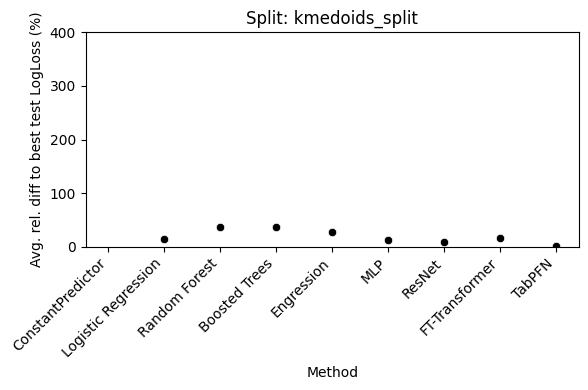

Split 'gower_split': baseline LogLoss per task:
 task_id
361110    0.351619
361111    0.589544
361113    0.441223
361282    0.595996
361283    0.479031
361285    0.444867
361286    0.586617
dtype: float64
Split 'gower_split': overall lowest LogLoss = 0.3516190933242076



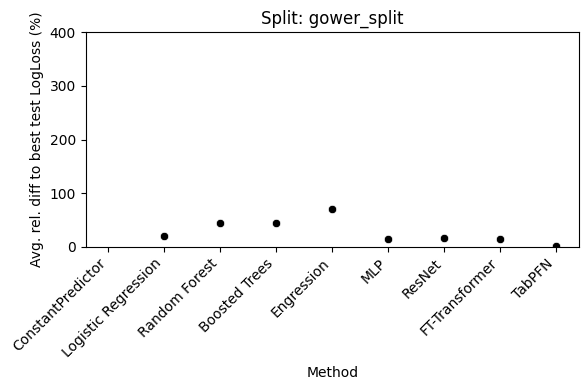

Split 'mahalanobis_split': baseline LogLoss per task:
 task_id
361055    0.501903
361060    0.357319
361061    0.351846
361062    0.014027
361063    0.361255
361065    0.168174
361066    0.342971
361068    0.200565
361069    0.526203
361070    0.588932
361273    0.634833
361274    0.431258
361275    0.558196
361276    0.612075
361277    0.238297
361278    0.531371
dtype: float64
Split 'mahalanobis_split': overall lowest LogLoss = 0.0140273265802697



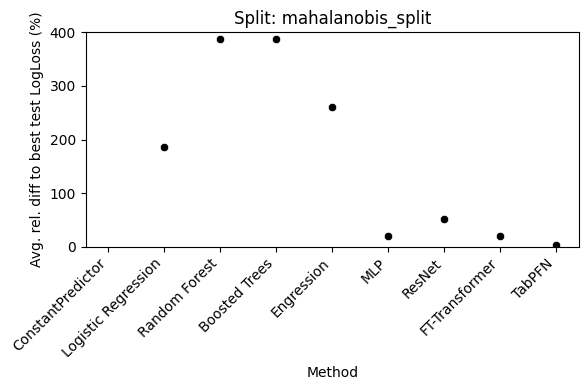

Split 'kmeans_split': baseline LogLoss per task:
 task_id
361055    0.489345
361060    0.281320
361061    0.354831
361062    0.016683
361063    0.342734
361065    0.204121
361066    0.388224
361068    0.190469
361069    0.508119
361070    0.615358
361273    0.642692
361274    0.439716
361275    0.444180
361276    0.514993
361277    0.212590
361278    0.582570
dtype: float64
Split 'kmeans_split': overall lowest LogLoss = 0.0166826513256447



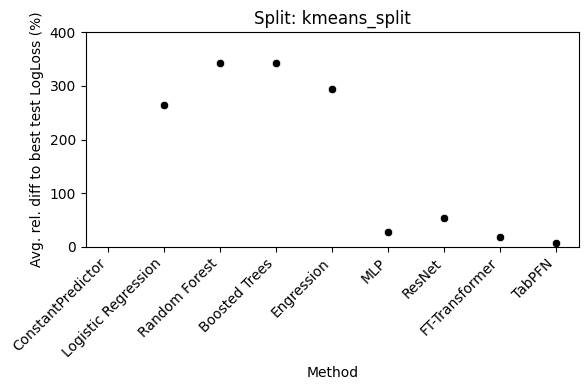

Split 'spatial_depth_split': baseline LogLoss per task:
 task_id
361055    0.508274
361060    0.358448
361061    0.354590
361062    0.013702
361063    0.354760
361065    0.170664
361066    0.347166
361068    0.206350
361069    0.524665
361070    0.590738
361273    0.636284
361274    0.432232
361275    0.559006
361276    0.617472
361277    0.244174
361278    0.533870
dtype: float64
Split 'spatial_depth_split': overall lowest LogLoss = 0.0137016512607903



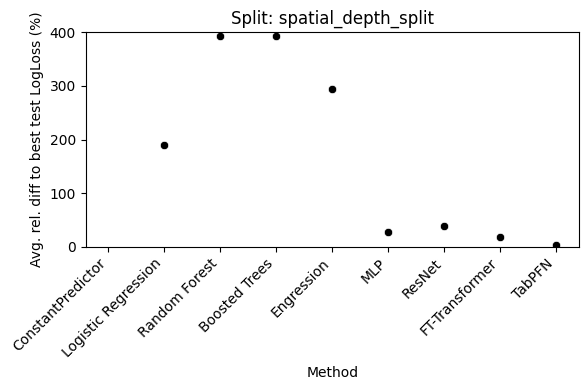

In [3]:
outdir = os.path.join('PICTURES', metric.lower())
os.makedirs(outdir, exist_ok=True)

for split in splits:
    sub = df[df["split_method"] == split]
    if sub.empty:
        continue

    table = sub.pivot(
        index="model",
        columns="task_id",
        values="value"
    )

    baseline = table.min(axis=0)
    print(f"Split '{split}': baseline LogLoss per task:\n", baseline)
    print(f"Split '{split}': overall lowest LogLoss = {baseline.min()}\n")

    rel = (table -baseline) / baseline

    summary = pd.DataFrame({
        "Mean": rel.mean(axis=1),
        "Median": rel.median(axis=1),
        "Std": rel.std(axis=1)
    }).reset_index().rename(columns={"model": "Method"})

    summary["Method"] = pd.Categorical(
        summary["Method"],
        categories=method_order,
        ordered=True
    )
    summary = summary.sort_values("Method")
    summary["Method"] = summary["Method"].astype(str).map(rename_map).fillna(summary["Method"].astype(str))

    summary["Mean"] = 100 * summary["Mean"]

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=summary, x="Method", y="Mean", color='black')
    plt.xlabel("Method")
    plt.ylabel("Avg. rel. diff to best test LogLoss (%)")
    plt.title(f"Split: {split}")
    plt.ylim(0, 400)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    fname = f"{split}_relative_diff_{metric}.png"
    plt.savefig(os.path.join(outdir, fname), bbox_inches='tight')
    plt.show()




In [4]:
df = df[df["metric"] == "LogLoss"]

df = df[df["split_method"] != "random_split"]


=== RAW relative_difference sample ===
      split_method  task_id              model      value  baseline  \
5       umap_split   361110  LogisticRegressor   0.597111  0.461733   
7       umap_split   361110  ConstantPredictor  18.958962  0.461733   
9   kmedoids_split   361110  LogisticRegressor   0.512814  0.417091   
11  kmedoids_split   361110  ConstantPredictor  20.997524  0.417091   
13     gower_split   361110  LogisticRegressor   0.452231  0.351619   
15     gower_split   361110  ConstantPredictor  20.941363  0.351619   
25     gower_split   361110         Engression   0.612796  0.351619   
26     gower_split   361110                MLP   0.437351  0.351619   
28     gower_split   361110             ResNet   0.428813  0.351619   
30     gower_split   361110      FTTransformer   0.427206  0.351619   
33  kmedoids_split   361110         Engression   0.669729  0.417091   
34  kmedoids_split   361110                MLP   0.546512  0.417091   
36  kmedoids_split   361110          

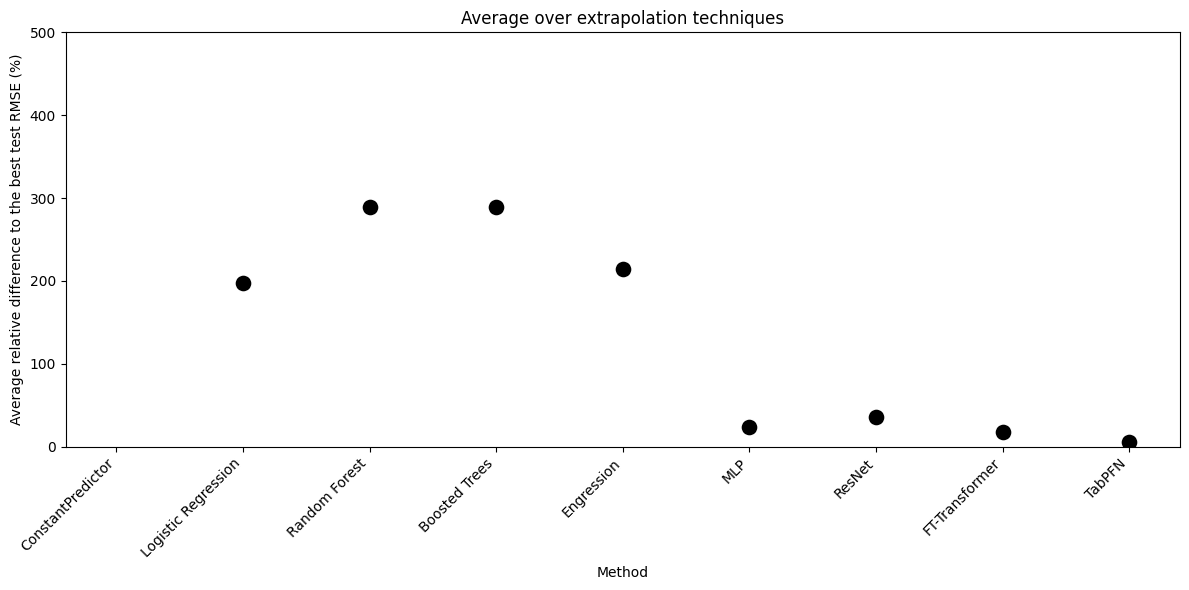

In [5]:
df["baseline"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .transform("min")
)

df["relative_difference"] = (df["value"] - df["baseline"]) / df["baseline"]

print("\n=== RAW relative_difference sample ===")
print(df[['split_method','task_id','model','value','baseline','relative_difference']].head(20))

print("\n=== per-model relative_difference summary ===")
print(df.groupby('model')['relative_difference']
        .agg(count='count', mean='mean', min='min', max='max')
        .sort_values('mean', ascending=False)
     )

print("\n=== model appearance counts ===")
print(df.groupby('model')['relative_difference']
        .count()
        .sort_values(ascending=False)
     )

# 3) Compute overall mean per model
# --- assume df already has 'relative_difference' computed and filtered ---

# 1) Compute overall average per raw model name
overall = (
    df
    .groupby('model')['relative_difference']
    .mean()
    .reset_index(name='Mean')
)
overall['Mean'] *= 100  # to percent

# 2) Enforce complete ordering on the raw model keys
method_order = [
    'ConstantPredictor', 'LogisticRegressor',
    'RandomForestClassifier', 'RandomForestRegressor',
    'LGBMClassifier', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'TabPFNClassifier'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

# 3) Map to display names
rename_map = {
    'RandomForestClassifier':'Random Forest',
    'RandomForestRegressor':'Random Forest',
    'LGBMClassifier':       'Boosted Trees',
    'LGBMRegressor':        'Boosted Trees',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'LogisticRegressor':    'Logistic Regression',
    'TabPFNClassifier':     'TabPFN'
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])


plt.figure(figsize=(12,6))
sns.scatterplot(data=overall, x='Method', y='Mean', color='black', s=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average relative difference to the best test RMSE (%)')
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')
plt.ylim(0, 500)
plt.tight_layout()

os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_LogLoss.png', bbox_inches='tight')
plt.show()
